<a href="https://colab.research.google.com/github/levicristiano/salary_forecast/blob/main/salary_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```



Foi selecionada uma base de dados que contém informações sobre  profissionais do setor de tecnologia, tais como salário, gênero e anos de experiência. A base de dados possui 62000 linhas e tendo em vista o cenário, procuramos estabelecer um modelo de previsão do salário do funcionário, a partir dos inputs inseridos.       

A database was selected that contains information about professionals in the technology sector, such as salary, gender and years of experience. The database has 62000 lines and considering the scenario, we try to establish a forecast model of the employee's salary, based on the inserted inputs.


# Importar Bibliotecas

In [32]:
import numpy as np
import pandas as pd

# Data frame padrão do sklearn utilizado para validação de metodologias
from sklearn.datasets import fetch_openml

#Os métodos mágicos não devem ser invocados diretamente por você, mas a invocação 
#acontece internamente a partir da classe em uma determinada ação.

%matplotlib inline
import matplotlib as mpl
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


#medotologia de classificação
from sklearn.linear_model import SGDClassifier
#from sklearn.model_selection import cross_val_score
#metodologia de avaliação do modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


from sklearn.model_selection import train_test_split

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
db = pd.read_csv('/content/drive/MyDrive/Trabalho AP2 Data Mining/Levels_Fyi_Salary_Data.csv', sep=",")

In [35]:
db.info()
# Observamos que algumas colunas como "race", "Gender" e "Education" estavam com muitos dados faltantes
# Com isso já saberiamos que deveriamos fazer algo a partir do cenário apresentado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [36]:
db.describe()
#Com a demonstração dos quartis, observamos que alguns dados estão fora do padrão estabelecido.
#No último quartil por exemplo, as colunas de years of experience possuem dados muito fora da média da base.

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
db.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [38]:
db.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [39]:
df = db.drop(["level","timestamp","tag","otherdetails","cityid","dmaid"], axis=1) 
db = df

# Tendo em vista a base apresentada, decidimos retirar as colunas em questão pois todas as que foram selecionadas eram 
# irrelevantes para a nossa análise final.

In [40]:
db.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
db.isnull().sum()

company                        5
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

A partir dessa etapa, decidimos utilizar gráficos para a melhor visualização para análise desejada.

(array([6.0526e+04, 2.0060e+03, 8.6000e+01, 1.6000e+01, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([  10000.,  507000., 1004000., 1501000., 1998000., 2495000.,
        2992000., 3489000., 3986000., 4483000., 4980000.]),
 <BarContainer object of 10 artists>)

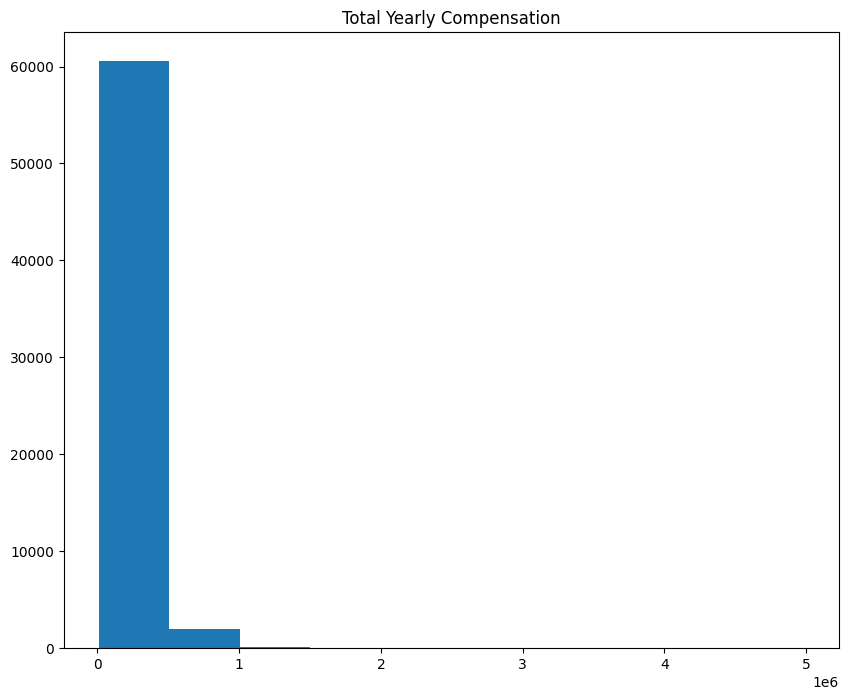

In [42]:
plt.figure(figsize=(10,8))
tyc=np.array(db["totalyearlycompensation"])
plt.title("Total Yearly Compensation")
plt.hist(tyc)


(array([3.4556e+04, 1.8404e+04, 8.2430e+03, 1.1570e+03, 2.1900e+02,
        5.9000e+01, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  6.9, 13.8, 20.7, 27.6, 34.5, 41.4, 48.3, 55.2, 62.1, 69. ]),
 <BarContainer object of 10 artists>)

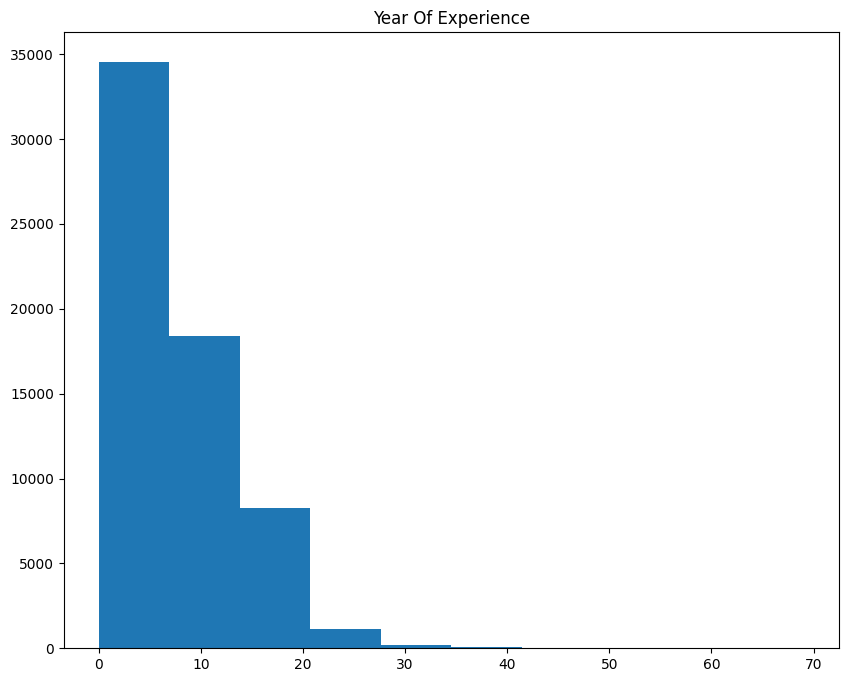

In [43]:
plt.figure(figsize=(10,8))
plt.title("Year Of Experience")
yoe=np.array(db["yearsofexperience"])
plt.hist(yoe)

(array([4.6178e+04, 1.6126e+04, 2.2500e+02, 8.7000e+01, 1.9000e+01,
        5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([      0.,  165987.,  331974.,  497961.,  663948.,  829935.,
         995922., 1161909., 1327896., 1493883., 1659870.]),
 <BarContainer object of 10 artists>)

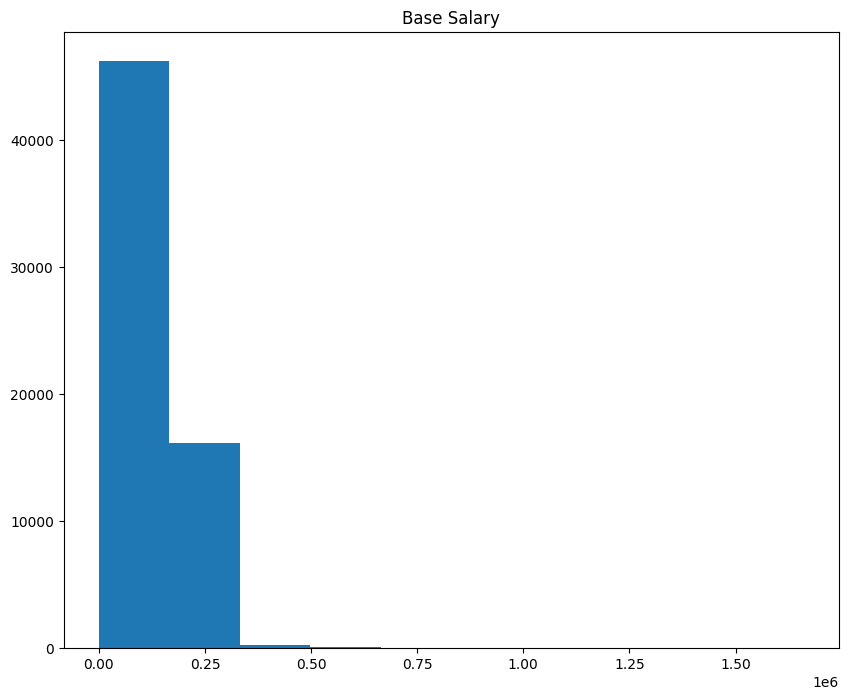

In [44]:
plt.figure(figsize=(10,8))
plt.title("Base Salary")
bs=np.array(db["basesalary"])
plt.hist(bs)

(array([6.1591e+04, 8.7800e+02, 1.1000e+02, 3.6000e+01, 1.4000e+01,
        1.0000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([      0.,  100000.,  200000.,  300000.,  400000.,  500000.,
         600000.,  700000.,  800000.,  900000., 1000000.]),
 <BarContainer object of 10 artists>)

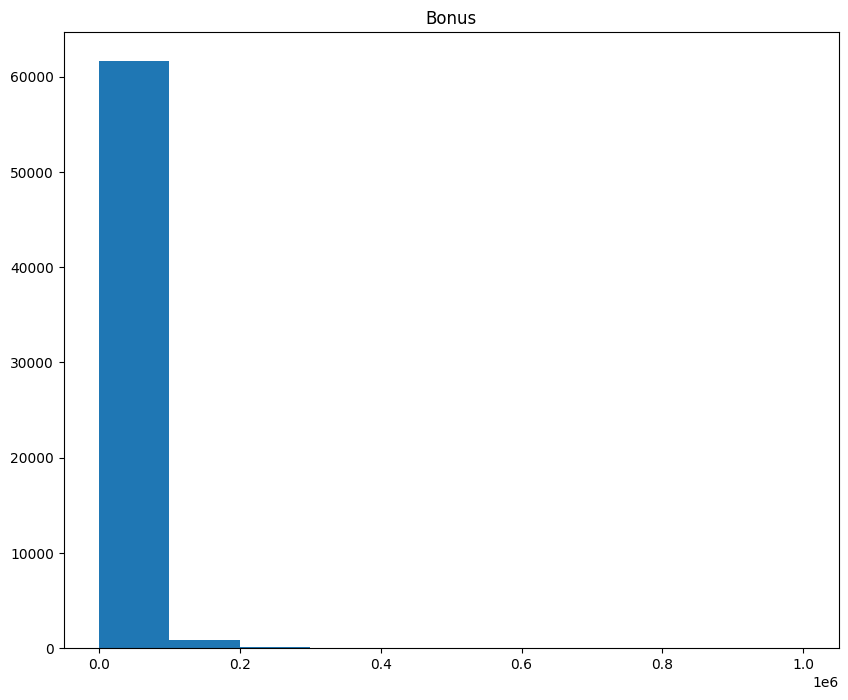

In [45]:
plt.figure(figsize=(10,8))
plt.title("Bonus")
bonus=np.array(db["bonus"])
plt.hist(bonus)

(array([5.6503e+04, 5.0380e+03, 9.6900e+02, 1.2100e+02, 9.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  6.9, 13.8, 20.7, 27.6, 34.5, 41.4, 48.3, 55.2, 62.1, 69. ]),
 <BarContainer object of 10 artists>)

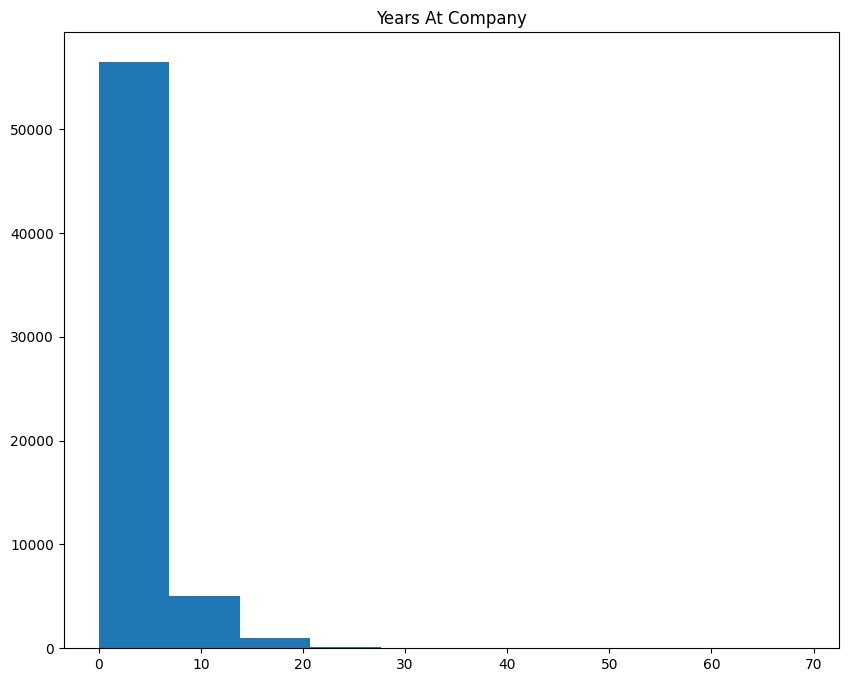

In [46]:
plt.figure(figsize=(10,8))
plt.title("Years At Company")
yat=np.array(db["yearsatcompany"])
plt.hist(yat)

(array([6.114e+04, 1.326e+03, 1.490e+02, 2.300e+01, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([      0.,  280000.,  560000.,  840000., 1120000., 1400000.,
        1680000., 1960000., 2240000., 2520000., 2800000.]),
 <BarContainer object of 10 artists>)

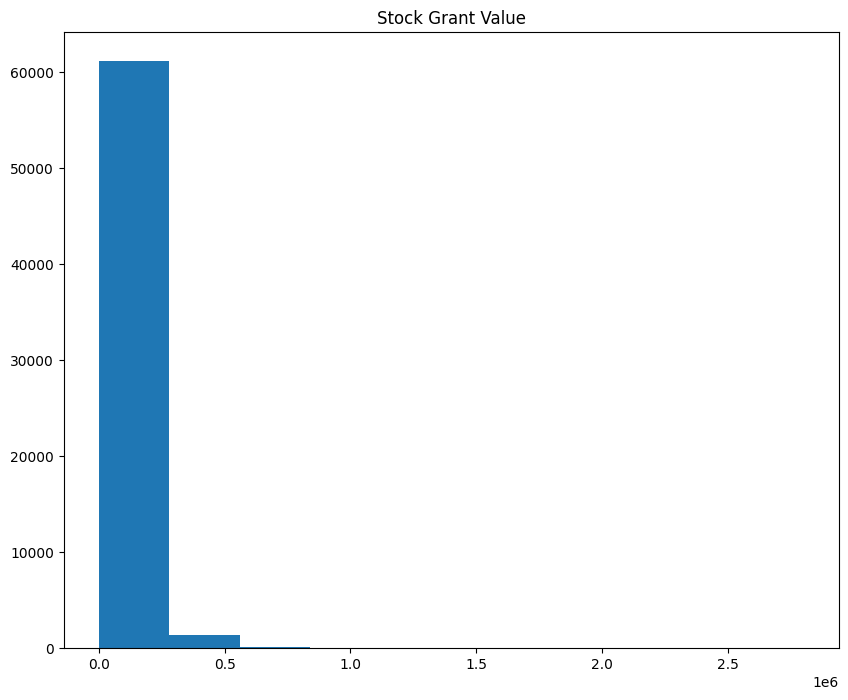

In [47]:
plt.figure(figsize=(10,8))
plt.title("Stock Grant Value")
sgv=np.array(db["stockgrantvalue"])
plt.hist(sgv)

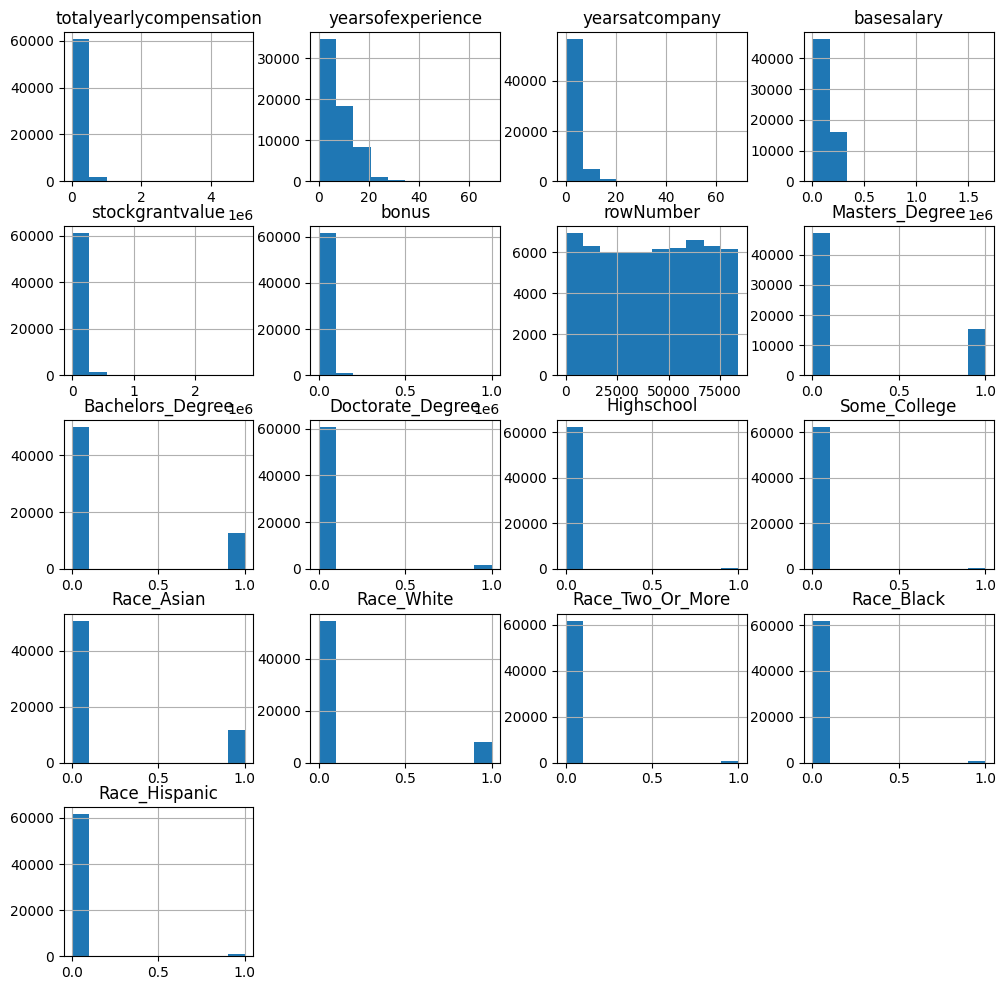

In [48]:
db.hist(figsize=(12,12))
plt.show()

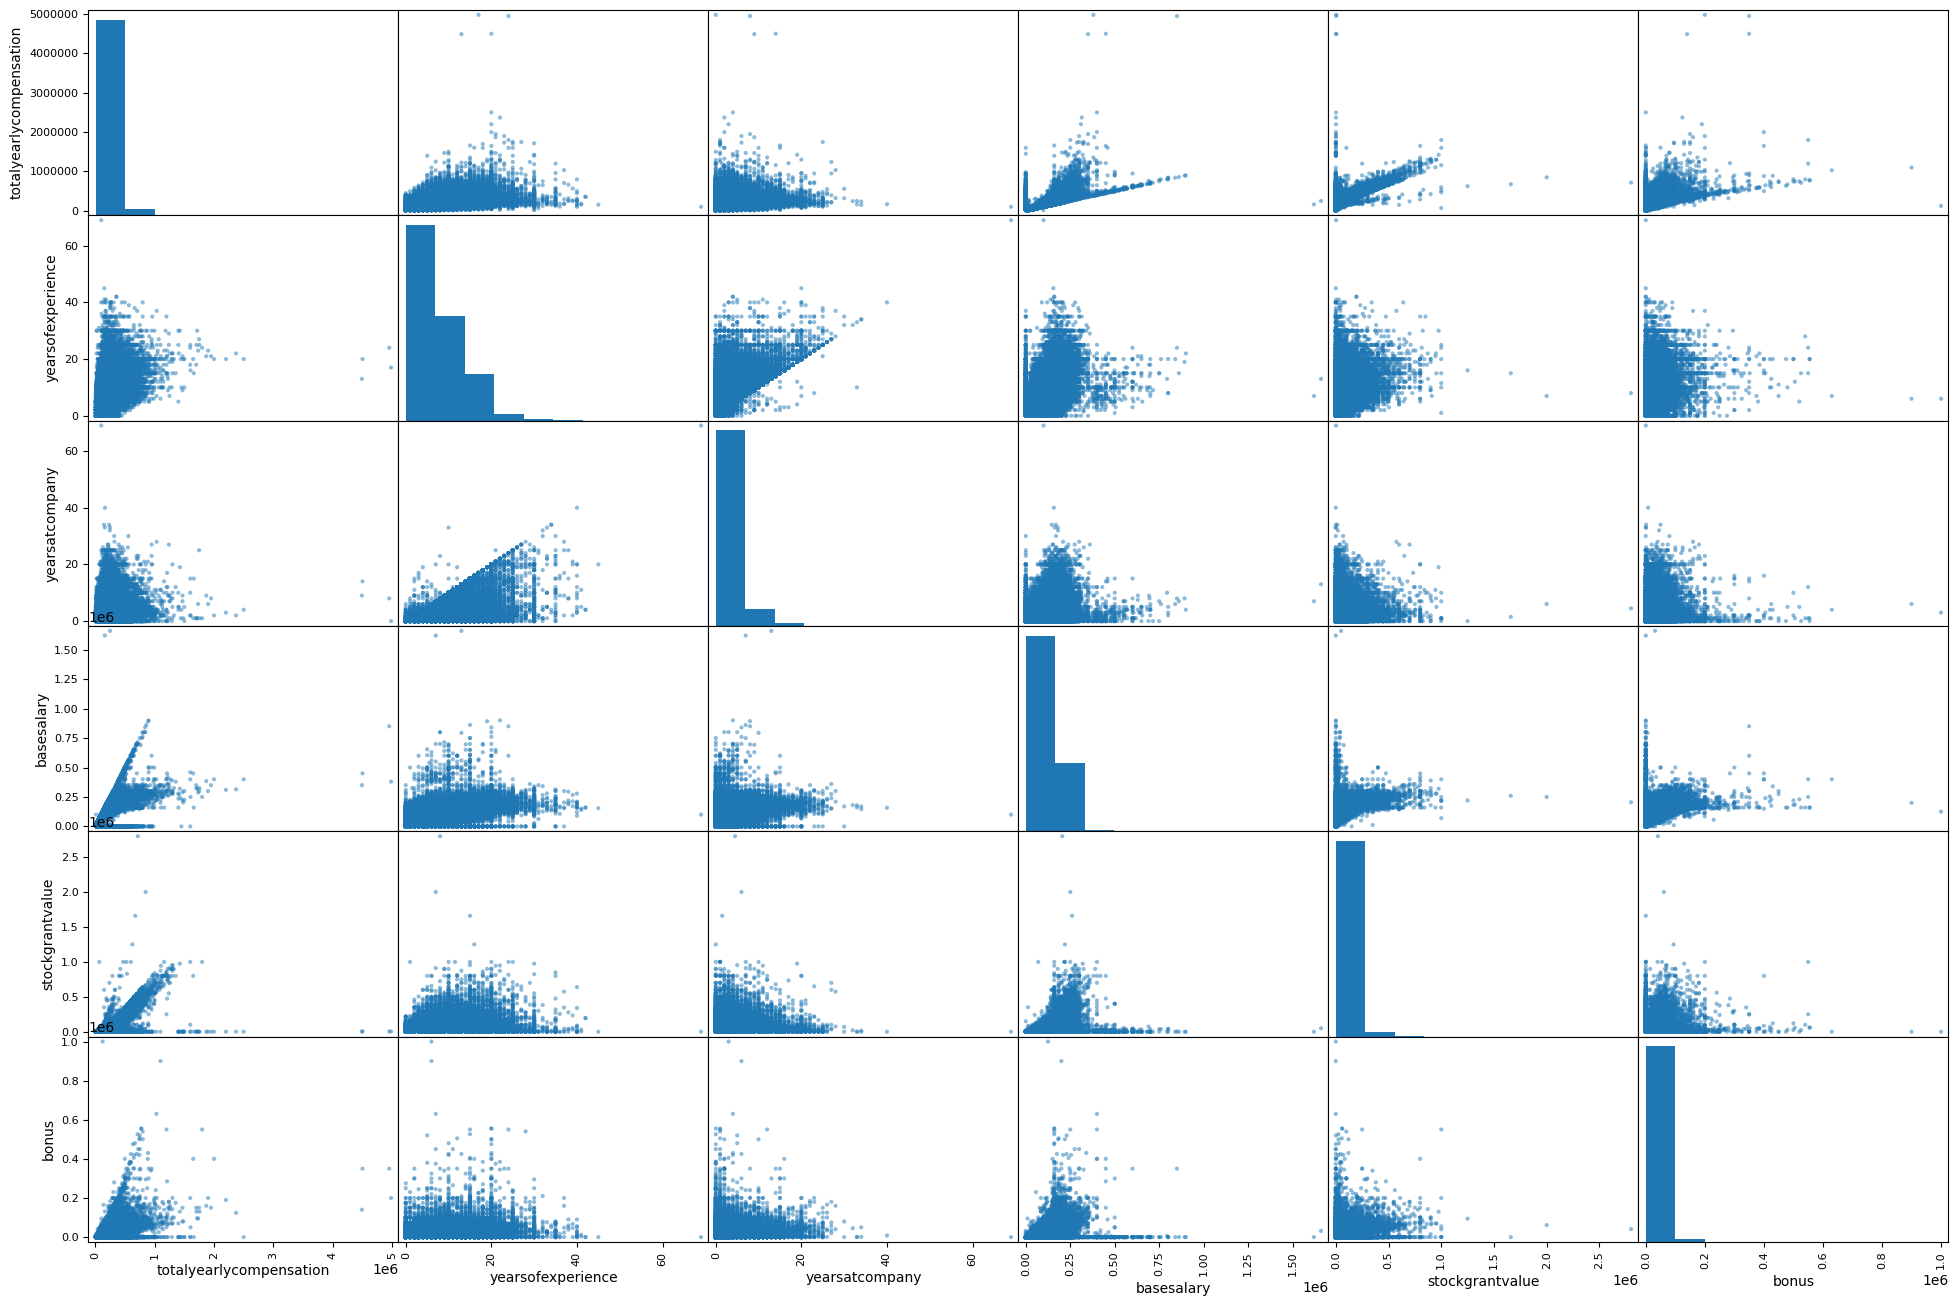

In [49]:
attributes = ["totalyearlycompensation", "yearsofexperience","yearsatcompany","basesalary","stockgrantvalue","bonus"]
pd.plotting.scatter_matrix(df[attributes], figsize=(24, 16))
plt.show()

In [50]:
corr_matrix=db.corr()
print(corr_matrix)

#Utilizamos a matriz de correlação para visualizar quais variáveis apresentadas 
#seriam mais relevantes para a nossa análise de salário

#Stock grant-value: maior correlação (0,77)

                         totalyearlycompensation  yearsofexperience  \
totalyearlycompensation                 1.000000           0.422879   
yearsofexperience                       0.422879           1.000000   
yearsatcompany                          0.165802           0.522611   
basesalary                              0.672865           0.374437   
stockgrantvalue                         0.770756           0.289631   
bonus                                   0.489454           0.261051   
rowNumber                              -0.092622          -0.002836   
Masters_Degree                          0.018320           0.060310   
Bachelors_Degree                       -0.139866          -0.069468   
Doctorate_Degree                        0.097179          -0.005380   
Highschool                             -0.014831           0.011605   
Some_College                           -0.003380           0.037925   
Race_Asian                             -0.080072          -0.052659   
Race_W

<ipython-input-50-e02513e5fe71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=db.corr()


In [51]:
df = db.drop(["rowNumber","Masters_Degree","Bachelors_Degree","Doctorate_Degree","Highschool","Some_College","Race_Asian","Race_White","Race_Two_Or_More","Race_Black","Race_Hispanic","Race","Education","gender"], axis=1) 
db = df

#Tendo em vista a análise, decidimos utilizar as variáveis com a correlação positiva para que tenhamos mais precisão na análise final.
#Assim sendo retiramos as demais colunas da base.

In [52]:
corr_matrix=db.corr()
print(corr_matrix)

                         totalyearlycompensation  yearsofexperience  \
totalyearlycompensation                 1.000000           0.422879   
yearsofexperience                       0.422879           1.000000   
yearsatcompany                          0.165802           0.522611   
basesalary                              0.672865           0.374437   
stockgrantvalue                         0.770756           0.289631   
bonus                                   0.489454           0.261051   

                         yearsatcompany  basesalary  stockgrantvalue     bonus  
totalyearlycompensation        0.165802    0.672865         0.770756  0.489454  
yearsofexperience              0.522611    0.374437         0.289631  0.261051  
yearsatcompany                 1.000000    0.145596         0.089492  0.108122  
basesalary                     0.145596    1.000000         0.468266  0.394352  
stockgrantvalue                0.089492    0.468266         1.000000  0.248151  
bonus           

<ipython-input-52-c46553a4e0c3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=db.corr()


In [53]:

for x in range(len(yoe)):
    if yoe[x]>=70:
        yoe[x]=70
print(yoe[:10])

#Retiramos os outliers da base pois eles poderiam alterar a nossa análise para um cenário distante da média 

[ 1.5  5.   8.   7.   5.   8.5 15.   4.   3.  12. ]


[127000 100000 310000 372000 157000 208000 300000 156000 120000 201000]


(array([ 5388., 16700., 19598., 10241.,  4755.,  2781.,  1346.,   765.,
          367.,   701.]),
 array([ 10000.,  84000., 158000., 232000., 306000., 380000., 454000.,
        528000., 602000., 676000., 750000.]),
 <BarContainer object of 10 artists>)

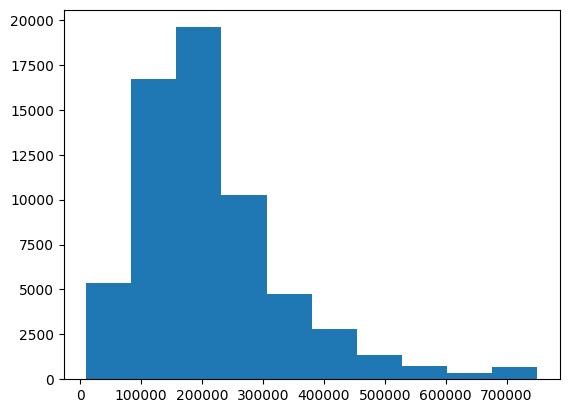

In [54]:
for x in range(len(tyc)):
    if tyc[x]>=700000:
        tyc[x]=750000
print(tyc[:10])
plt.hist(tyc)

#Fizemos um ajuste no histograma, pois existiam dados muito acima do padrão observado
#com isso atrapalhavam a distribuição dos dados no histograma

# Separação entre Treino e Teste

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
#para dados sem extratificação
from sklearn.model_selection import train_test_split
#para dados com extratificação
from sklearn.model_selection import StratifiedShuffleSplit

##from google.colab import files
from google.colab import files

##pandas para scatter matrix
from pandas.plotting import scatter_matrix

###
###importando pacotes específicos  bibliotecas de AI
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [56]:
df.describe()
df.head()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,20000.0,10000.0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,0.0,0.0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,0.0,0.0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,180000.0,35000.0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,0.0,0.0


In [57]:
dfteste = df.copy()


In [58]:
treino,teste = train_test_split(dfteste,test_size=0.2,random_state=42)
treino_y1 = treino[["totalyearlycompensation"]]
teste_y1 = teste[["totalyearlycompensation"]]
treino_x1 = treino[["stockgrantvalue"]]
teste_x1 = teste[["stockgrantvalue"]]

#Escolhemos o nosso Stock Grant Value para ser o nosso X ja que ele possui alta correlação com a nossa variável de salário

In [59]:
xt=dfteste["stockgrantvalue"]
xt=np.array(xt)
print(xt)


[20000.     0.     0. ... 25000. 57000. 27000.]


[115000.      0.  65000. ...   4000. 110000.   4000.]


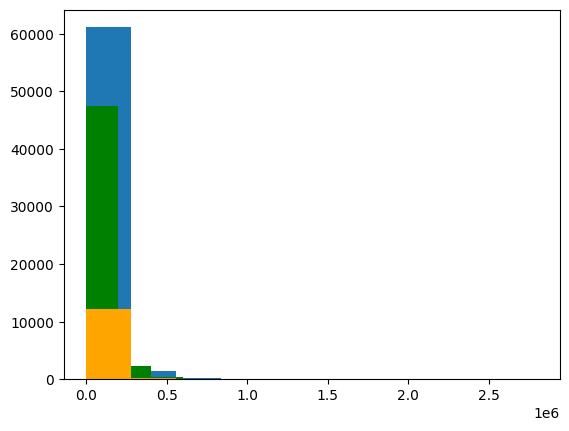

In [60]:

#train_xh = treino_x1.flatten()
train_xh = np.array(treino_x1)

train_xh = train_xh.flatten()
print(train_xh)

teste_xh=np.array(teste_x1)
teste_xh=teste_xh.flatten()

plt.hist(xt)
plt.hist(train_xh,color="green")
plt.hist(teste_xh, color="orange")
plt.show()


In [61]:
# modeloRLMQ
modeloRLMQ = linear_model.LinearRegression()
modeloRLMQ.fit (treino_x1, treino_y1)

a=modeloRLMQ.coef_
b=modeloRLMQ.intercept_

print("a", a)
print("b", b)

a [[1.32281325]]
b [148040.17399816]


In [62]:
pred = modeloRLMQ.predict(teste_x1)
mae = mean_absolute_error(teste_y1, pred)
rmse = np.sqrt(mean_squared_error(teste_y1, pred))
r2 = r2_score(teste_y1, pred)  
print("MAE:",mae,
      "RMSE:",rmse,
      "R2:",r2)

#Acima utilizamos os testes para descobrir a predição do modelo, ao qual achamos erros elevados 
#e o r2, demonstrando um grau de ajuste de 50%, demonstrou que o modelo é bem explicado pela variável "stock_grant_value"


MAE: 48356.98591533926 RMSE: 98717.33413515023 R2: 0.5013848478334806


In [63]:
print(len(treino_y1))

50113


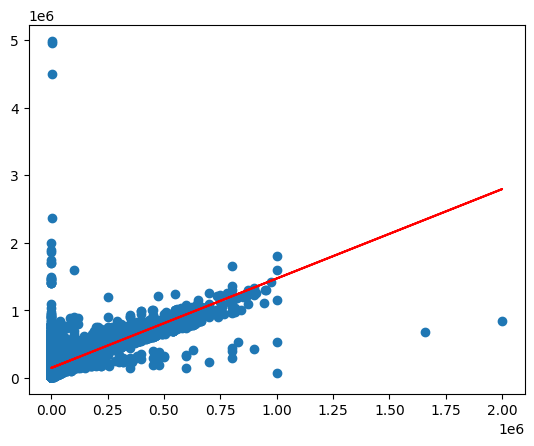

In [64]:
plt.scatter(treino_x1, treino_y1)
#treino
y= b + a * (treino_x1)
plt.plot(treino_x1, y, 'red')



plt.show()

#A comparação da distribuição com a linha de plotagem do modelo demonstra um bom ajuste em relação à base de dados, visto que caminham na mesma direção e com um erro pequeno

Árvore de Decisão

In [65]:
ar_model=DecisionTreeRegressor()
ar_model.fit(treino_x1,treino_y1)
ar_p=ar_model.predict(treino_x1)

In [66]:
MAE=mean_absolute_error(treino_y1,ar_p)
print("MAE:",np.ceil(MAE))
RMSE=np.sqrt(mean_squared_error(treino_y1,ar_p))
print("RMSE:",np.ceil(RMSE))
R2=r2_score(treino_y1,ar_p)
print("R2:",R2)

# Observa-se que a utilização da árvore de decisão gera resultados melhores do que a regressão linear, com erros menores e um R2 maior: 
# MAE: 48k -> 44k
# RMSE: 98k -> 71k
# R2: 0,5 -> 0,71

MAE: 44420.0
RMSE: 71511.0
R2: 0.7298653144539544


In [67]:
ar_ptest=ar_model.predict(teste_x1)
MAE=mean_absolute_error(teste_y1,ar_ptest)
print("MAE:",np.ceil(MAE))
RMSE=np.sqrt(mean_squared_error(teste_y1,ar_ptest))
print("RMSE:",np.ceil(RMSE))
R2=r2_score(teste_y1,ar_ptest)
print("R2:",R2)

# Observa-se que a utilização da árvore de regressão gera resultados melhores do que a regressão linear, mas piores do que a árvore da base de treino.
#Isso ocorre pois o modelo foi criado à partir da base de treino, e se ajusta muito bem a ela.  

MAE: 46172.0
RMSE: 88015.0
R2: 0.6036440652121863


In [68]:
copydf = df.copy()
copydf = copydf.drop(["location","company","title"],axis=1)
copydf.describe()


,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000


In [69]:
treino,teste = train_test_split(dfteste,test_size=0.2,random_state=42)
treino_y2 = treino[["totalyearlycompensation"]]
teste_y2 = teste[["totalyearlycompensation"]]
treino_x2 = treino[["stockgrantvalue","yearsofexperience"]]
teste_x2 = teste[["stockgrantvalue","yearsofexperience"]]

modeloRLMQ = linear_model.LinearRegression()
modeloRLMQ.fit (treino_x2, treino_y2)

a=modeloRLMQ.coef_
b=modeloRLMQ.intercept_

print("a", a)
print("b", b)

#Modelo construído a partir de duas variáveis independentes -> posse de ações da empresa e anos de experiência

a [[1.21856654e+00 4.96694884e+03]]
b [117608.95218136]


In [70]:
print(treino_x2)

       stockgrantvalue  yearsofexperience
27827         115000.0               20.0
41636              0.0                8.0
18587          65000.0                3.0
9273            7000.0                4.0
60841              0.0                7.0
...                ...                ...
62570         480000.0               10.0
38158              0.0                5.0
860             4000.0                2.0
15795         110000.0                7.0
56422           4000.0                6.0

[50113 rows x 2 columns]


In [71]:
pred = modeloRLMQ.predict(teste_x2)
mae = mean_absolute_error(teste_y2, pred)
rmse = np.sqrt(mean_squared_error(teste_y2, pred))
r2 = r2_score(teste_y2, pred)  
print("MAE:",mae,
      "RMSE:",rmse,
      "R2:",r2)

#O modelo apresenta menor grau de ajuste em relação à árvore de decisão, apesar da inclusão de uma variável, mas o erro foi menor.

MAE: 44708.96579667861 RMSE: 93115.80103814462 R2: 0.5563654086568327
